# **Ghost Type Predictions**

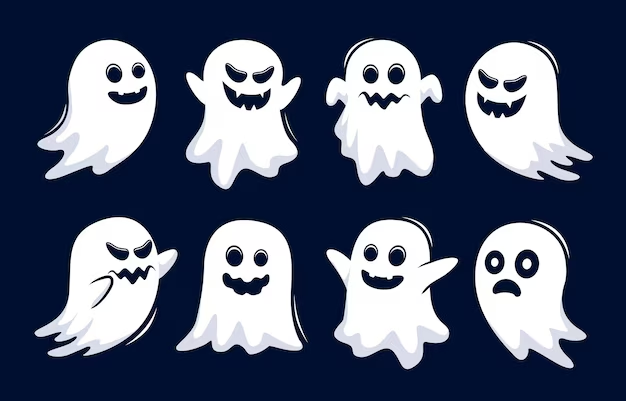
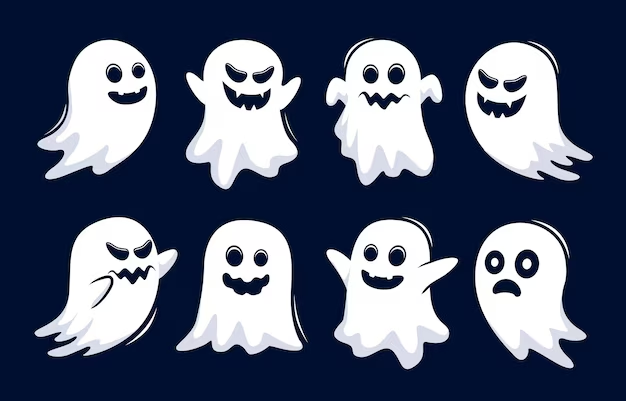

## **Introduction**
In this project, the goal is to predict the `Ghost` type from a dataset containing various features such as `bone_length`, `rotting_flesh`, `hair_length`, `has_soul`, and `color`. The dataset includes different types of creatures, including `Ghoul`, `Goblin`, and `Ghost`. By leveraging machine learning algorithms, we aim to classify the creatures into one of these three types based on the given features, with a specific focus on predicting the `Ghost` type.

The dataset contains key characteristics of these creatures that can help us distinguish between the types, including the physical attributes (e.g., `bone_length`, `rotting_flesh`, `hair_length`) and more intangible qualities (e.g., `has_soul`, `color`). This predictive model will be built and evaluated using machine learning techniques to determine its accuracy in classifying the `Ghost` type.

## **Aim**
The aim of this project is to develop a classification model that accurately predicts the `Ghost` type from the dataset. We will preprocess the data, engineer relevant features, train machine learning models, and evaluate their performance. Specifically, we will focus on:
1. Exploring the dataset and performing feature engineering.
2. Training classification models to predict the `type` of the creatures.
3. Evaluating the model performance with metrics such as accuracy, confusion matrix, and classification report.
4. Fine-tuning the model to improve its predictive power.

## **Dataset Columns Description**

- **id**: A unique identifier for each observation.
- **bone_length**: The length of the creature's bones, a numerical feature that may be indicative of its type.
- **rotting_flesh**: A numerical feature representing the amount of rotting flesh, potentially distinguishing certain types.
- **hair_length**: The length of the creature's hair, used to differentiate between various types.
- **has_soul**: A numerical value representing whether the creature has a soul, with values ranging from 0 to 1 (0 indicating no soul and 1 indicating the presence of a soul).
- **color**: The color of the creature, which might be correlated with its type (e.g., clear, green, black).
- **type**: The class label, indicating the type of creature. This is the target variable we aim to predict, with possible values being `Ghoul`, `Goblin`, and `Ghost`.

## Requirements

In [44]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [58]:
df=pd.read_csv('/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip')

## EDA (Exploratory Data Analysis)

In [46]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [47]:
df.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [49]:
df.shape

(371, 7)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,371.0,443.676550,263.222489,0.000000,205.500000,458.000000,678.500000,897.000000
bone_length,371.0,0.434160,0.132833,0.061032,0.340006,0.434891,0.517223,0.817001
rotting_flesh,371.0,0.506848,0.146358,0.095687,0.414812,0.501552,0.603977,0.932466
hair_length,371.0,0.529114,0.169902,0.134600,0.407428,0.538642,0.647244,1.000000
has_soul,371.0,0.471392,0.176129,0.009402,0.348002,0.466372,0.600610,0.935721


In [51]:
df["type"].unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

In [52]:
df["color"].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

## Data Visualization

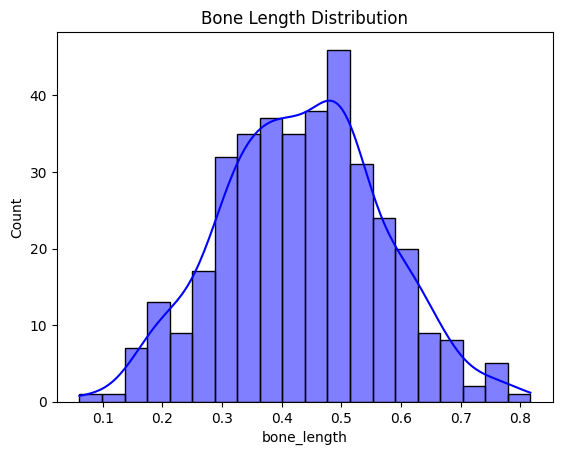

In [109]:
sns.histplot(df['bone_length'], kde=True, color='blue', bins=20)
plt.title('Bone Length Distribution')
plt.show()

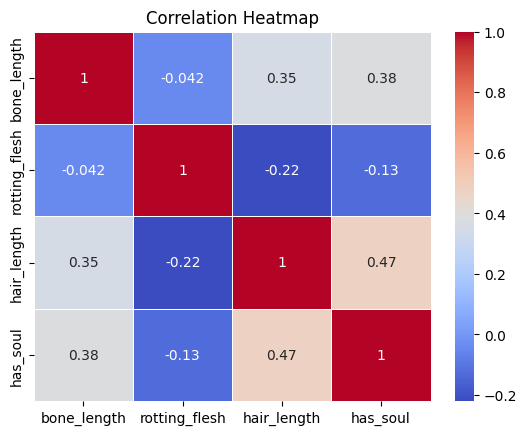

In [110]:
corr = df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

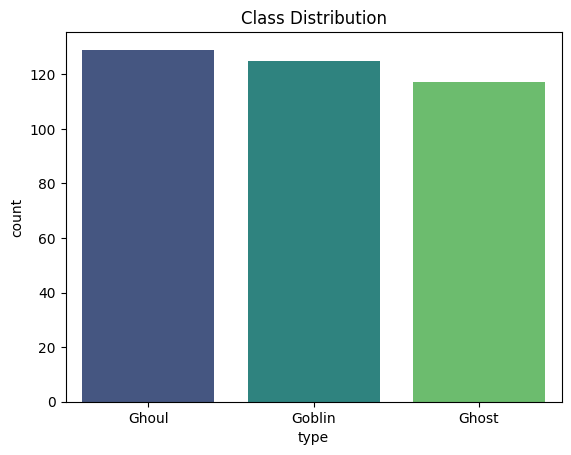

In [111]:
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Class Distribution')
plt.show()

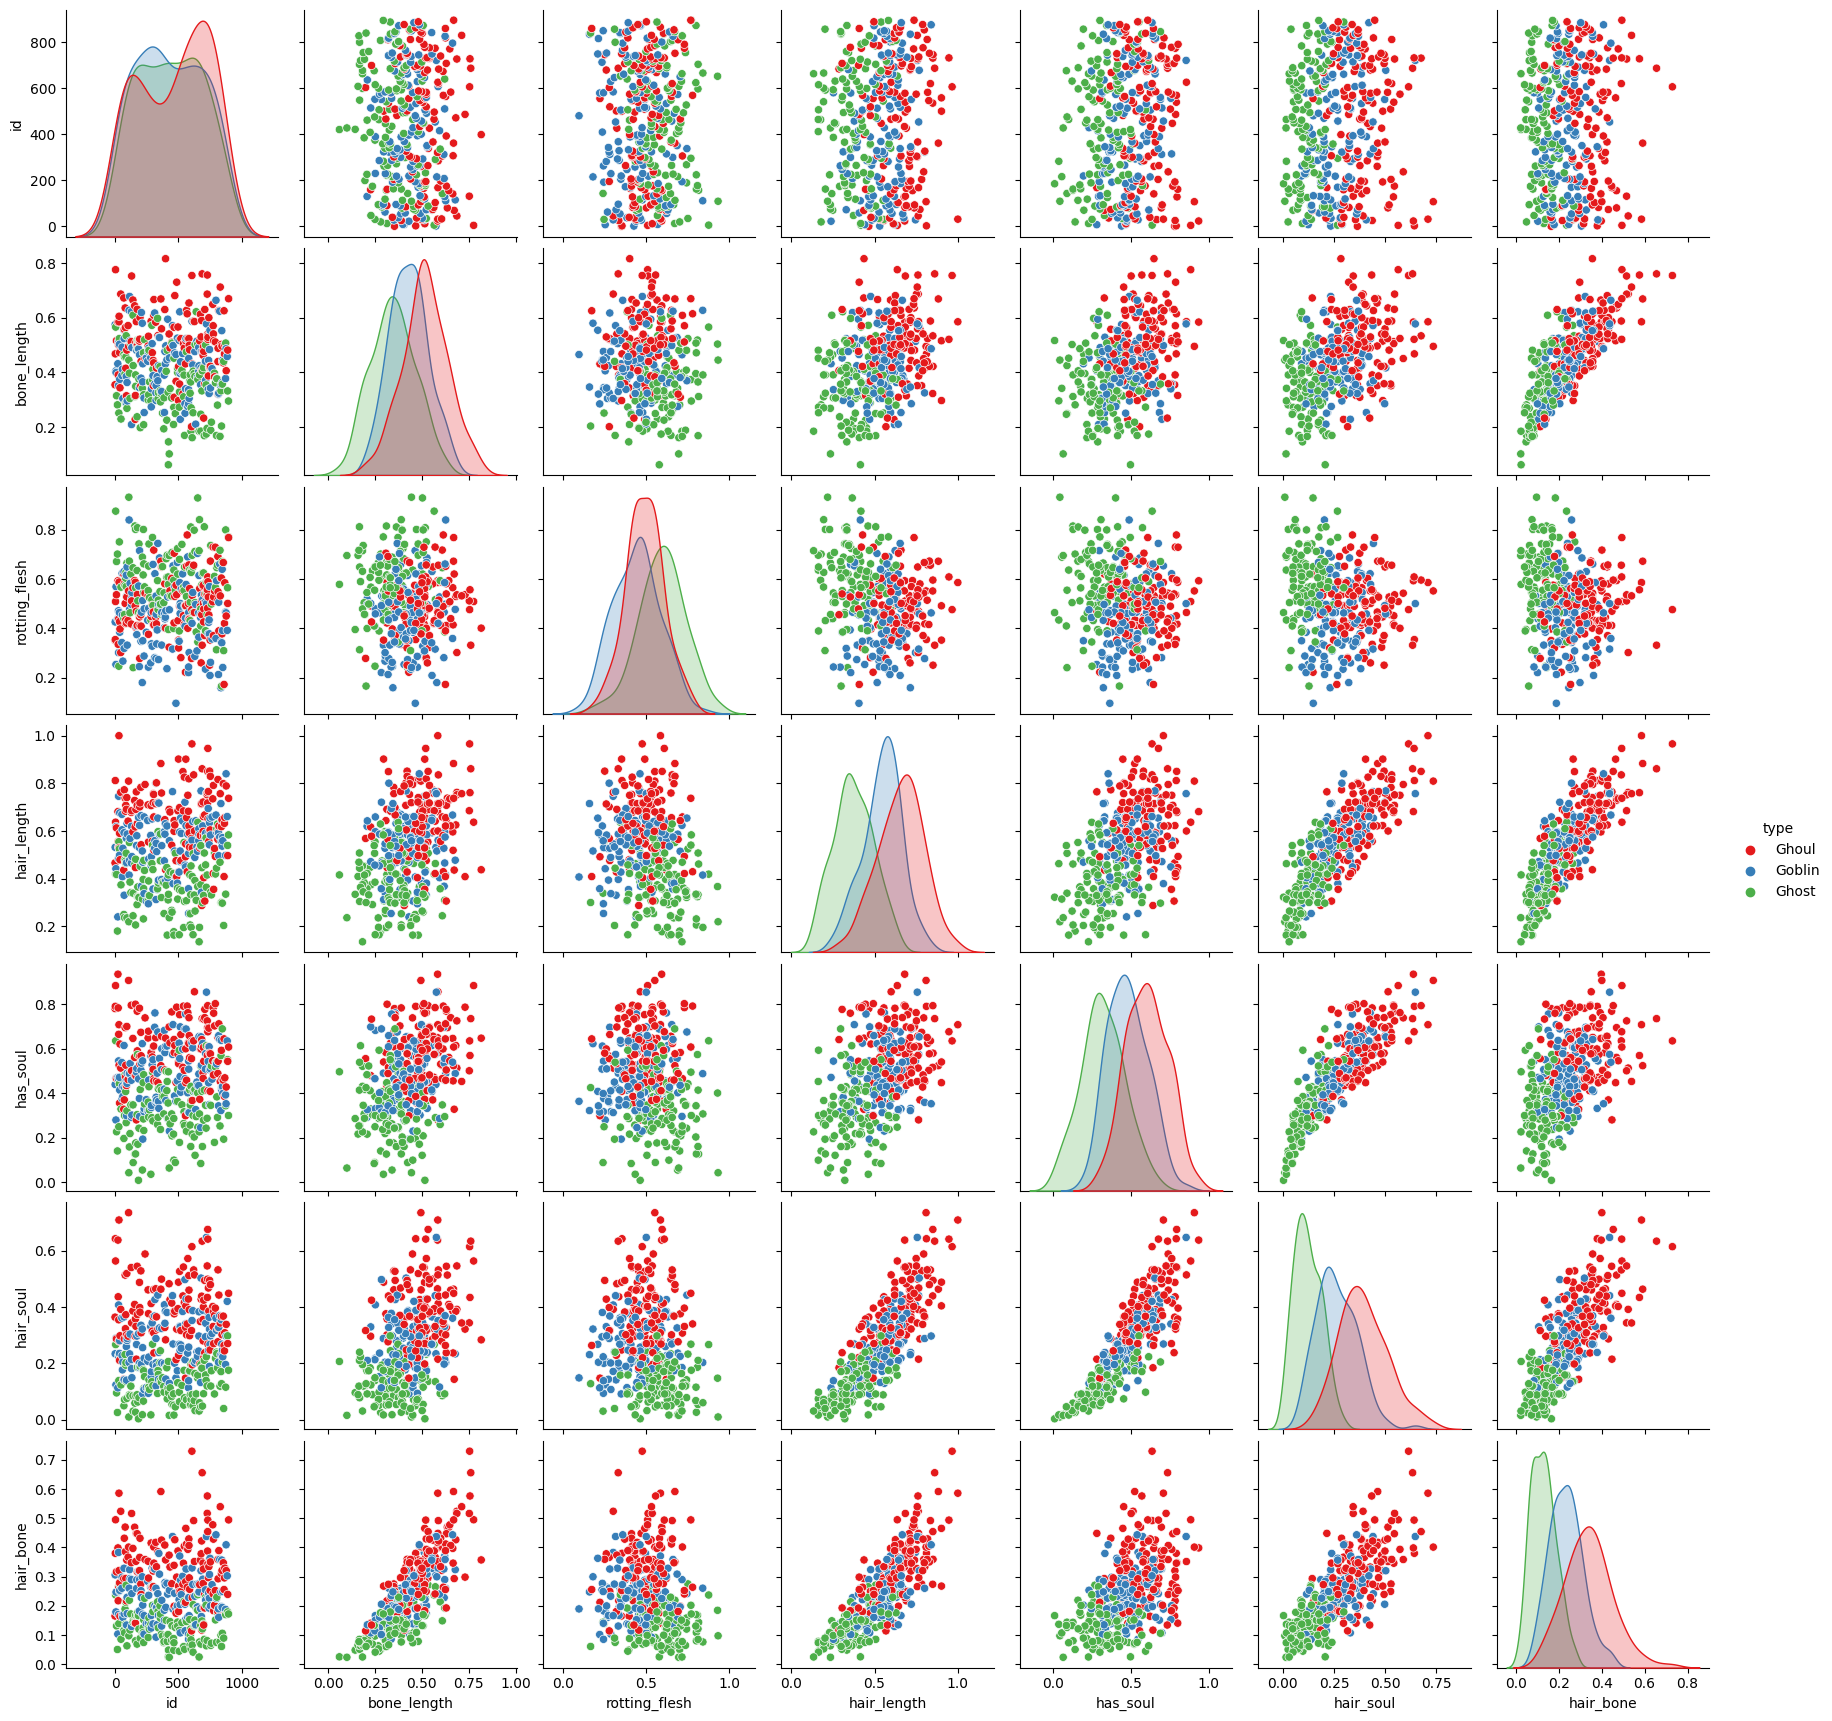

In [112]:
sns.pairplot(df, hue='type', palette='Set1')
plt.show()

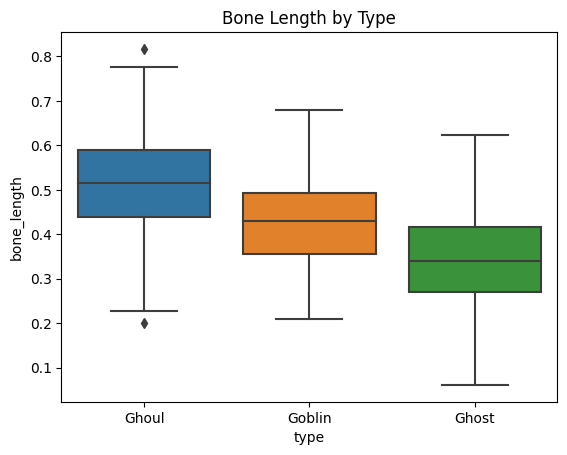

In [113]:
sns.boxplot(data=df, x='type', y='bone_length')
plt.title('Bone Length by Type')
plt.show()

## Feature Engineering

In [73]:
def feature_engineering(df):
    df['hair_soul'] = df['hair_length'] * df['has_soul']
    df['hair_bone'] = df['hair_length'] * df['bone_length']

In [74]:
feature_engineering(df)

## Modelling with Conversational Models

In [64]:
x=df.drop(['id','type'],axis=1)
y=df[['type']]

In [65]:
x=pd.get_dummies(x,drop_first=True)

In [66]:
import logging
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    logging.basicConfig(level=logging.ERROR)
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    lgbm = lgb.LGBMClassifier(verbose=-1)  
    
    algos = [g, b, l, d, rf, h, k, lgbm]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier', 
                  'LightGBM Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["type"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]


Confusion Matrix of Random Forest Classifier


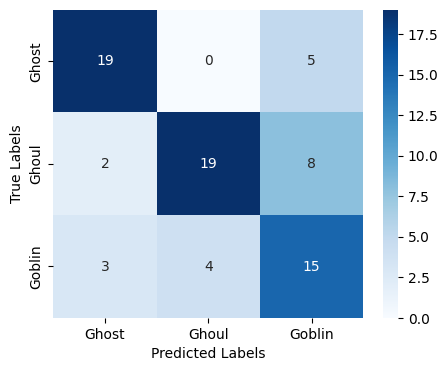

Confusion Matrix of Logistic Regression


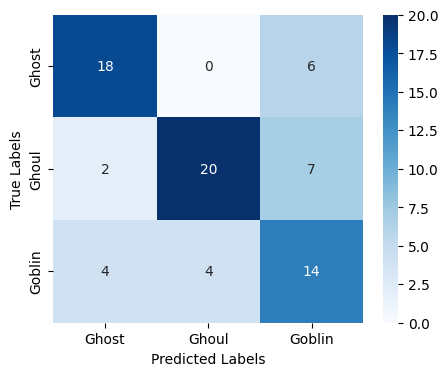

Confusion Matrix of Gradient Boosting Classifier


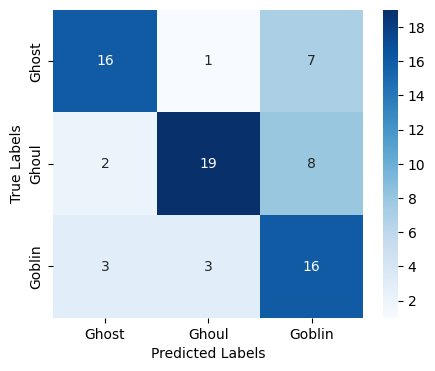

Confusion Matrix of LightGBM Classifier


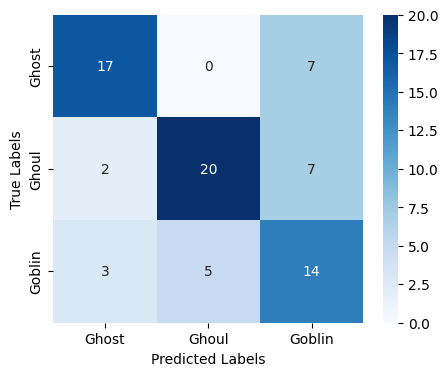

Confusion Matrix of Gaussian NB


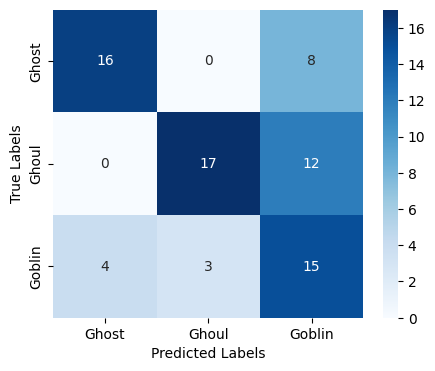

Confusion Matrix of Decision Tree Classifier


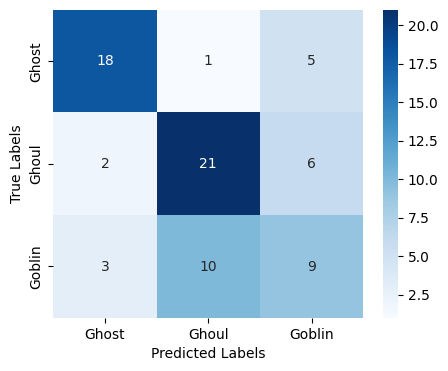

Confusion Matrix of KNeighbors Classifier


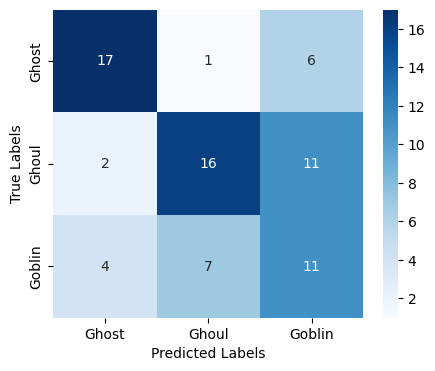

Confusion Matrix of Bernoulli NB


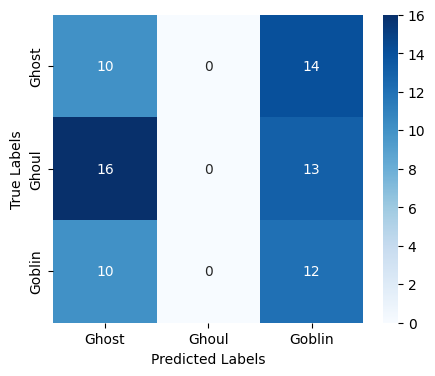

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

       Ghost       0.79      0.79      0.79        24
       Ghoul       0.83      0.66      0.73        29
      Goblin       0.54      0.68      0.60        22

    accuracy                           0.71        75
   macro avg       0.72      0.71      0.71        75
weighted avg       0.73      0.71      0.71        75

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

       Ghost       0.75      0.75      0.75        24
       Ghoul       0.83      0.69      0.75        29
      Goblin       0.52      0.64      0.57        22

    accuracy                           0.69        75
   macro avg       0.70      0.69      0.69        75
weighted avg       0.71      0.69      0.70        75

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

       Ghost       0.76      0.

,Accuracy Score
Random Forest Classifier,0.706667
Logistic Regression,0.693333
Gradient Boosting Classifier,0.680000
LightGBM Classifier,0.680000
Gaussian NB,0.640000
Decision Tree Classifier,0.640000
KNeighbors Classifier,0.586667
Bernoulli NB,0.293333


In [67]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
model1=rf.fit(x_train, y_train)

## Testing the Best Conversational Model

In [71]:
df_test=pd.read_csv('/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip')

In [72]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [75]:
feature_engineering(df_test)

In [76]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,hair_soul,hair_bone
0,3,0.471774,0.387937,0.706087,0.698537,black,0.493228,0.333114
1,6,0.427332,0.645024,0.565558,0.451462,white,0.255328,0.241681
2,9,0.549602,0.491931,0.660387,0.449809,black,0.297048,0.362950
3,10,0.638095,0.682867,0.471409,0.356924,white,0.168257,0.300804
4,13,0.361762,0.583997,0.377256,0.276364,black,0.104260,0.136477


In [79]:
submission=pd.DataFrame({
    'id':df_test['id']
})

In [80]:
df_test.drop('id',axis=1,inplace=True)

In [83]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [84]:
predictions=model1.predict(df_test)

In [86]:
submission['type']=predictions

In [87]:
submission.to_csv('submission.csv',index=False)

## **Conclusion**

In this project, we aimed to predict the type of creature, specifically focusing on the `Ghost` type, using various machine learning classifiers. After training several models on the dataset, we evaluated their performance based on accuracy scores.

The results showed that the **Random Forest Classifier** performed the best with an accuracy of **70.67%**, followed closely by the **Logistic Regression** model at **69.33%**. Both models demonstrated good predictive performance, making them reliable choices for this task.

Other models like the **Gradient Boosting Classifier** and **LightGBM Classifier** had a similar performance, both achieving an accuracy of **68%**. Although their performance was slightly lower than that of the Random Forest and Logistic Regression models, they still provided valuable insights and could be further fine-tuned for improved results.

On the other hand, models such as **Gaussian NB**, **Decision Tree Classifier**, and **KNeighbors Classifier** showed relatively lower accuracy, with **KNeighbors Classifier** performing the worst at **58.67%**. The **Bernoulli Naive Bayes** model had the lowest accuracy at **29.33%**, indicating that it is not a suitable model for this particular classification task.

### **Key Takeaways:**
- The **Random Forest Classifier** emerged as the top performer, followed by **Logistic Regression**.
- Models like **Gradient Boosting** and **LightGBM** showed competitive results, making them strong alternatives.
- Further model tuning and feature engineering could help improve the predictive accuracy of these models.
- The **Gaussian NB**, **Decision Tree**, and **KNeighbors** models need further adjustments to perform better in predicting the creature type.